In [19]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  

model.train(
    data='C:/Users/izbas/Downloads/rod/data.yaml',
    epochs=50,
    imgsz=640,
    batch=8,
    name='exp1',
    pretrained=True
)

New https://pypi.org/project/ultralytics/8.3.141 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.133  Python-3.11.7 torch-2.5.1 CPU (AMD Ryzen 5 5600H with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:/Users/izbas/Downloads/rod/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp14, nbs=64, nms=False, opset=Non

train: Scanning C:\Users\izbas\Downloads\rod\train\labels.cache... 3148 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3148/3148 [00:00<?, ?it/s]

WARNING Box and segment counts should be equal, but got len(segments) = 5247, len(boxes) = 6228. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
val: Fast image access  (ping: 0.00.0 ms, read: 220.285.5 MB/s, size: 81.5 KB)



val: Scanning C:\Users\izbas\Downloads\rod\valid\labels.cache... 482 images, 0 backgrounds, 0 corrupt: 100%|██████████| 482/482 [00:00<?, ?it/s]

WARNING Box and segment counts should be equal, but got len(segments) = 1091, len(boxes) = 1216. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs\detect\exp14\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\exp14
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.528       3.13      1.877         35        640:   2%|▏         | 7/394 [00:16<15:11,  2.35s/it]


KeyboardInterrupt: 

In [ ]:
model = YOLO("runs/detect/exp1/weights/best.pt")
results = model.predict("C:/Users/izbas/Downloads/rod/test/images")
results = model.predict(
    source="C:/Users/izbas/Downloads/rod/test/images",  
    save=True,                     
    conf=0.25,                     
    imgsz=640                      
)


image 1/270 C:\Users\izbas\Downloads\rod\test\images\464-1-_png_jpg.rf.5e94236803ce12a9616d636abf7ee030.jpg: 640x640 1 1, 77.6ms
image 2/270 C:\Users\izbas\Downloads\rod\test\images\IMG_8674_JPG_jpg.rf.802b6b936bf668ef2d077f2094309d1c.jpg: 640x640 2 1s, 66.8ms
image 3/270 C:\Users\izbas\Downloads\rod\test\images\IMG_8675_JPG_jpg.rf.f3910d328c71a8c4db6679d0f80afcc9.jpg: 640x640 1 0, 1 1, 62.3ms
image 4/270 C:\Users\izbas\Downloads\rod\test\images\T011000_jpg.rf.0fe8761316c9c08835b371afc79ba629.jpg: 640x640 1 0, 1 1, 60.8ms
image 5/270 C:\Users\izbas\Downloads\rod\test\images\T011000_jpg.rf.e8a91c3bb4c6856acb754dfad936e9f1.jpg: 640x640 1 0, 1 1, 65.0ms
image 6/270 C:\Users\izbas\Downloads\rod\test\images\T011001_jpg.rf.534efdbaec9043fbe0d6649b1037426b.jpg: 640x640 2 1s, 69.1ms
image 7/270 C:\Users\izbas\Downloads\rod\test\images\T011001_jpg.rf.68f30c04add9dfe4bd66f8b194437487.jpg: 640x640 2 1s, 60.7ms
image 8/270 C:\Users\izbas\Downloads\rod\test\images\T011002_jpg.rf.6a19af7d44f263a9fa

In [7]:
from PIL import Image

im_array = results[0].plot()
im = Image.fromarray(im_array)
im.show()

In [ ]:
r = results[0]

boxes = r.boxes.xyxy   
scores = r.boxes.conf  
classes = r.boxes.cls  

for i in range(len(boxes)):
    cls = int(classes[i].item())
    score = float(scores[i].item())
    box = boxes[i].tolist()
    print(f"Class: {cls}, Confidence: {score:.2f}, Box: {box}")

Class: 1, Confidence: 0.49, Box: [125.37960815429688, 315.04986572265625, 345.8467102050781, 640.0]


In [10]:
for r in results:
    print("---- New Image ----")
    boxes = r.boxes.xyxy
    scores = r.boxes.conf
    classes = r.boxes.cls

    for i in range(len(boxes)):
        cls = int(classes[i].item())
        score = float(scores[i].item())
        box = boxes[i].tolist()
        print(f"Class: {cls}, Confidence: {score:.2f}, Box: {box}")

---- New Image ----
Class: 1, Confidence: 0.49, Box: [125.37960815429688, 315.04986572265625, 345.8467102050781, 640.0]
---- New Image ----
Class: 1, Confidence: 0.77, Box: [337.55242919921875, 298.9158935546875, 622.0879516601562, 640.0]
Class: 1, Confidence: 0.49, Box: [0.0, 277.004638671875, 266.3135986328125, 624.712158203125]
---- New Image ----
Class: 1, Confidence: 0.69, Box: [11.5296630859375, 88.8187255859375, 632.591552734375, 635.664306640625]
Class: 0, Confidence: 0.30, Box: [536.7520751953125, 13.88775634765625, 630.0220947265625, 347.6795654296875]
---- New Image ----
Class: 1, Confidence: 0.89, Box: [0.0, 2.2344970703125, 640.0, 640.0]
Class: 0, Confidence: 0.26, Box: [532.48486328125, 165.43997192382812, 603.440185546875, 256.7051086425781]
---- New Image ----
Class: 1, Confidence: 0.89, Box: [0.0, 2.231201171875, 640.0, 640.0]
Class: 0, Confidence: 0.26, Box: [532.4908447265625, 165.44317626953125, 603.4232177734375, 256.7029113769531]
---- New Image ----
Class: 1, Con


0: 640x640 2 1s, 72.8ms
Speed: 3.7ms preprocess, 72.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 1, 61.8ms
Speed: 3.3ms preprocess, 61.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 1s, 57.4ms
Speed: 3.3ms preprocess, 57.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 1s, 60.0ms
Speed: 2.6ms preprocess, 60.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 1 1, 56.3ms
Speed: 2.7ms preprocess, 56.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 0, 1 1, 54.8ms
Speed: 3.1ms preprocess, 54.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 1s, 108.6ms
Speed: 2.4ms preprocess, 108.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 1, 56.3ms
Speed: 2.9ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 1,

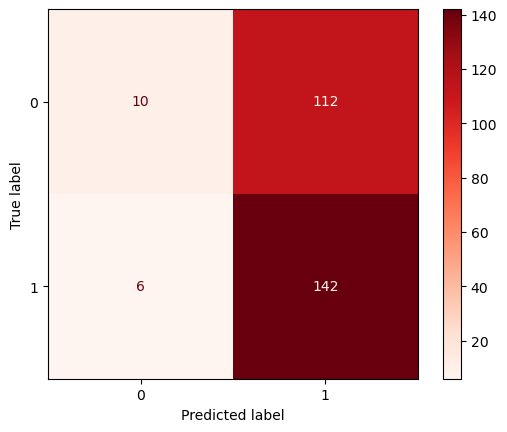

In [ ]:
y_true = []
y_pred = []

for img_name in os.listdir(img_dir):
    if not img_name.endswith((".jpg", ".jpeg", ".png")):
        continue

    img_path = os.path.join(img_dir, img_name)
    image = Image.open(img_path).convert("RGB")

    label_path = os.path.join(label_dir, os.path.splitext(img_name)[0] + ".txt")
    with open(label_path, "r") as f:
        line = f.readline()
        if not line:
            continue
        true_class = int(line.split()[0])
        y_true.append(true_class)

    results = model(np.array(image))
    if len(results[0].boxes) > 0:
        top_box = results[0].boxes[0]
        pred_class = int(top_box.cls[0].item())
        y_pred.append(pred_class)
    else:
        y_pred.append(-1)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")




In [12]:
from ultralytics import YOLO

model = YOLO("best.pt")
metrics = model.val(data="C:/Users/izbas/Downloads/rod/data.yaml")

Ultralytics 8.3.133  Python-3.11.7 torch-2.5.1 CPU (AMD Ryzen 5 5600H with Radeon Graphics)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.20.1 ms, read: 14.39.6 MB/s, size: 111.5 KB)


val: Scanning C:\Users\izbas\Downloads\rod\valid\labels.cache... 482 images, 0 backgrounds, 0 corrupt: 100%|██████████| 482/482 [00:00<?, ?it/s]

WARNING Box and segment counts should be equal, but got len(segments) = 1091, len(boxes) = 1216. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:40<00:00,  1.31s/it]


                   all        482       1216      0.613      0.534      0.541      0.433
                     0        342        503      0.417      0.219       0.19     0.0998
                     1        465        713       0.81      0.848      0.893      0.767
Speed: 1.5ms preprocess, 66.6ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\val2


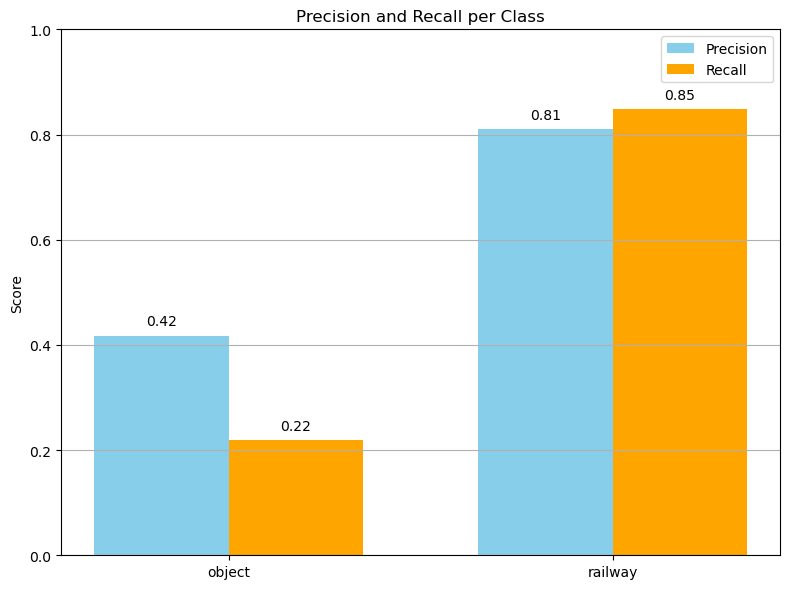

In [16]:
import matplotlib.pyplot as plt

classes = ['object', 'railway']
precision = [0.417, 0.810]
recall = [0.219, 0.848]

x = range(len(classes))
width = 0.35

plt.figure(figsize=(8, 6))
bars1 = plt.bar(x, precision, width=width, label='Precision', color='skyblue')
bars2 = plt.bar([i + width for i in x], recall, width=width, label='Recall', color='orange')

plt.xticks([i + width / 2 for i in x], classes)
plt.ylabel('Score')
plt.title('Precision and Recall per Class')
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y')

# Добавление значений над столбцами
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.2f}", ha='center', fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


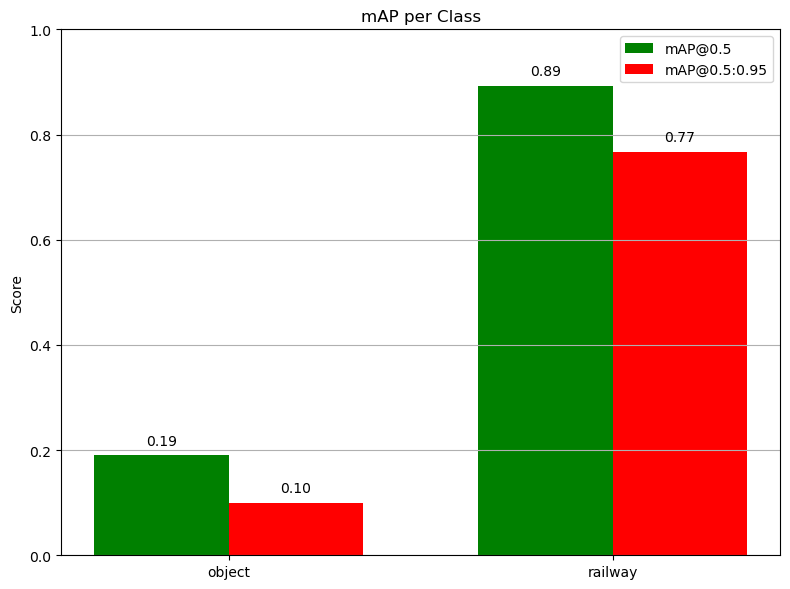

In [17]:
import matplotlib.pyplot as plt

classes = ['object', 'railway']
map_50 = [0.190, 0.893]
map_5095 = [0.0998, 0.767]

x = range(len(classes))
width = 0.35

plt.figure(figsize=(8, 6))
bars1 = plt.bar(x, map_50, width=width, label='mAP@0.5', color='green')
bars2 = plt.bar([i + width for i in x], map_5095, width=width, label='mAP@0.5:0.95', color='red')

plt.xticks([i + width / 2 for i in x], classes)
plt.ylabel('Score')
plt.title('mAP per Class')
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y')

# Добавляем значения над столбцами
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.2f}", ha='center', fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()
